<a href="https://colab.research.google.com/github/hungry-one/eng_eco/blob/main/RNN_model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install descartes

In [ ]:
import geopandas as gpd
import pandas as pd
import json
import matplotlib.pyplot as plt


In [ ]:
data= pd.read_csv("january_2001.csv")
data.columns

Index(['DISTRICT', 'DT_CEN_CD', 'ST_CEN_CD', 'ST_NM', 'censuscode', 'date',
       'mean'],
      dtype='object')

In [ ]:
data_for_map= data[['DISTRICT', 'mean']]
data_for_map.head()

,DISTRICT,mean
0,Chandigarh,446.011140
1,Daman,367.868075
2,Diu,322.519089
3,Dadra & Nagar Haveli,350.728562
4,South Goa,412.219281


In [ ]:
map = gpd.read_file('2011_Dist.shp')
map_= map[['DISTRICT', 'geometry']]
map_.head()

,DISTRICT,geometry
0,Adilabad,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


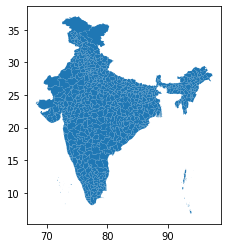

In [ ]:
map_.plot()

In [ ]:
merged = map_.set_index('DISTRICT').join(data_for_map.set_index('DISTRICT'))
merged.head()

,geometry,mean
DISTRICT,,
Adilabad,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",514.257414
Agra,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",627.731375
Ahmadabad,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",329.958513
Ahmadnagar,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",440.878746
Aizawl,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",190.489659


In [ ]:
merged.isna().sum()

geometry    0
mean        9
dtype: int64

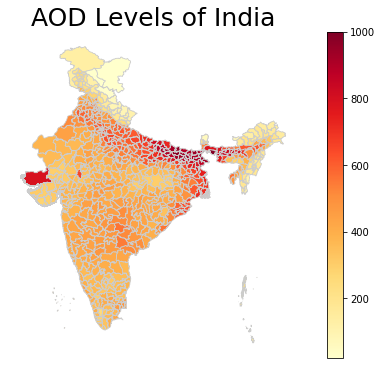

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('AOD Levels of India', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.plot(column='mean', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)